## Simple Linear regression 
*** using Indian_housing_pune_data dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("C:/Users/dbda/PycharmProjects/statistics/Dataset/Indian_housing_pune_data.csv")
df.head()

house_type   house_size       location  city   latitude  \
0          2 BHK Apartment     906 sq ft       Lohegaon  Pune  18.605820   
1          1 BHK Apartment     650 sq ft    Anand Nagar  Pune  18.474377   
2    1 RK Studio Apartment     350 sq ft        Wagholi  Pune  18.580336   
3          3 BHK Apartment   1,500 sq ft     Sangamvadi  Pune  18.541786   
4  5 BHK Independent House   5,000 sq ft  Wadgaon Sheri  Pune  18.560164   

   longitude   price currency  numBathrooms  numBalconies isNegotiable  \
0  73.912407   12000      INR           2.0           NaN          NaN   
1  73.820549   11000      INR           1.0           NaN          NaN   
2  73.980507    4500      INR           1.0           NaN          NaN   
3  73.882454   35000      INR           2.0           NaN          NaN   
4  73.924927  110000      INR           5.0           NaN          NaN   

   priceSqFt    verificationDate  \
0        NaN  Posted 3 years ago   
1        NaN  Posted 2 years ago   
2        NaN  Posted 2 years ago   
3        NaN  Posted 3 years ago   
4        NaN  Posted 3 years ago   

                                         description SecurityDeposit  \
0  A spacious 2 bhk multistorey apartment is avai...      No Deposit   
1  It has a built-up area of 650 sqft and is avai...      No Deposit   
2  This spacious 1 rk independent house is availa...      No Deposit   
3  Furnishings include 1 tv, 1 refrigerator, 1 so...      No Deposit   
4  Itâs a 5 bhk independent house situated in W...      No Deposit   

           Status  
0     Unfurnished  
1  Semi-Furnished  
2     Unfurnished  
3       Furnished  
4     Unfurnished

In [20]:
# Cleaning the 'house_size' column by removing the 'sq ft' string and commas, then converting to numeric
X = df['house_size'].str.replace(' sq ft', '', regex=False) 
X = X.str.replace(',', '')  # Remove commas
X = X.astype(float).values.reshape(-1, 1)  # Convert to float and reshape

y = df['price'].values  # Target


In [21]:
#Split the data set into traning and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
# Fit the linear Regression model
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [23]:
#make predction on the test set 
y_pred=model.predict(X_test)


In [24]:
#matrics and interpretaion
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

In [25]:
print("Model Coefficents:")
print(f"Slope(Coefficent for house_price):{model.coef_[0]}")
print(f"Intercept:{model.intercept_}")
print("\nModel performance Matric:")
print(f"Mean squared error(mse):{mse}")
print(f"Root mean squared error(rmse):{rmse}")
print(f"r^2 score (Explained variance):{r2}")

Model Coefficents:
Slope(Coefficent for house_price):25.895940043649098
Intercept:-4530.245496776624

Model performance Matric:
Mean squared error(mse):146703158.61478436
Root mean squared error(rmse):12112.10793440945
r^2 score (Explained variance):0.41769537139188684


In [26]:
#print predicted vs actual values for the test set
print("\nPredicted vs actual prices(test set):")
for actual,predicted in zip(y_test,y_pred):
    print(f"Actual:{actual:.2f},Predicted:{predicted:.2f}")


Predicted vs actual prices(test set):
Actual:17000.00,Predicted:30636.44
Actual:12500.00,Predicted:13596.91
Actual:45000.00,Predicted:31724.07
Actual:13000.00,Predicted:13078.99
Actual:9000.00,Predicted:13130.79
Actual:23000.00,Predicted:24473.21
Actual:22000.00,Predicted:26026.96
Actual:27000.00,Predicted:25431.36
Actual:100000.00,Predicted:70567.98
Actual:25000.00,Predicted:38301.64
Actual:20000.00,Predicted:19397.60
Actual:25000.00,Predicted:30066.73
Actual:7000.00,Predicted:18776.10
Actual:15000.00,Predicted:13337.95
Actual:29000.00,Predicted:21365.69
Actual:25000.00,Predicted:17481.30
Actual:13000.00,Predicted:8417.72
Actual:75000.00,Predicted:65388.79
Actual:15000.00,Predicted:27943.26
Actual:16000.00,Predicted:13078.99
Actual:22000.00,Predicted:9712.52
Actual:13000.00,Predicted:10178.65
Actual:27000.00,Predicted:10230.44
Actual:15000.00,Predicted:24343.73
Actual:18500.00,Predicted:11318.07
Actual:54000.00,Predicted:61297.23
Actual:15000.00,Predicted:21029.05
Actual:19000.00,Pre

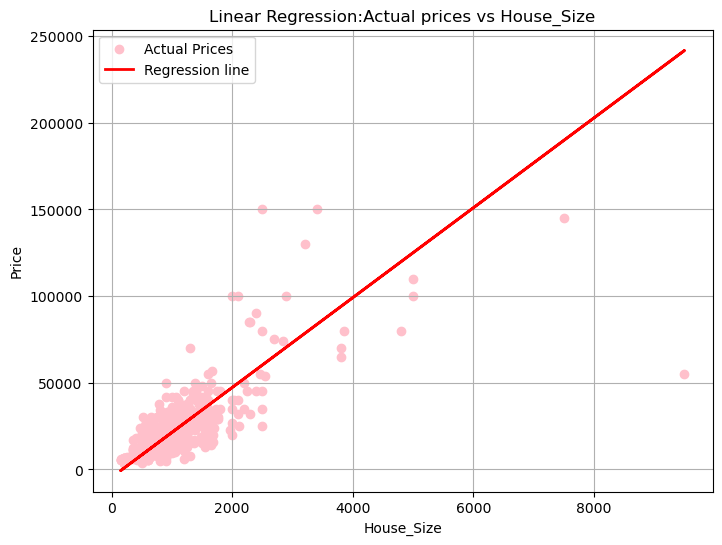

In [27]:
#plot the linear equation line and actual values
plt.figure(figsize=(8,6))
plt.scatter(X_test,y_test,color="pink",label="Actual Prices")
plt.plot(X_test,y_pred,color="red",linewidth=2,label="Regression line")
plt.xlabel("House_Size")
plt.ylabel("Price")
plt.title("Linear Regression:Actual prices vs House_Size")
plt.legend()
plt.grid()
plt.show()

### Multiple Linear Regression 
*** using Adverstising Dataset

In [29]:
df=pd.read_csv("C:/Users/dbda/PycharmProjects/statistics/Dataset/advertising.csv")
df.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [30]:
#Extract releveant columns
X=df[['TV','Radio','Newspaper']].values #Predictor
y=df['Sales'].values #Target

In [31]:
#Split the dataset into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
#Fit the linear regression model
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [33]:
#Make predictions on the test set
y_pred=model.predict(X_test)

In [34]:
#Metrics and Intepretation
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

In [36]:
print("Model Coefficents:")
print(f"Slope(Coefficent for X):{model.coef_[0]}")
print(f"Intercept:{model.intercept_}")
print("\nModel performance Metric:")
print(f"Mean squared error(mse):{mse}")
print(f"Root mean squared error(rmse):{rmse}")
print(f"r^2 score (Explained variance):{r2}")

Model Coefficents:
Slope(Coefficent for X):0.044729517468716326
Intercept:2.979067338122631

Model performance Metric:
Mean squared error(mse):3.1740973539761037
Root mean squared error(rmse):1.78159966153345
r^2 score (Explained variance):0.899438024100912


In [37]:
#Print predicted vs actual values for the test set
print("\nPredicted vs actual prices(test set):")
for actual,predicted in zip(y_test,y_pred):
    print(f"Actual:{actual:.2f},Predicted:{predicted:.2f}")


Predicted vs actual prices(test set):
Actual:16.90,Predicted:16.41
Actual:22.40,Predicted:20.89
Actual:21.40,Predicted:21.55
Actual:7.30,Predicted:10.61
Actual:24.70,Predicted:22.11
Actual:12.60,Predicted:13.11
Actual:22.30,Predicted:21.06
Actual:8.40,Predicted:7.46
Actual:11.50,Predicted:13.61
Actual:14.90,Predicted:15.16
Actual:9.50,Predicted:9.05
Actual:8.70,Predicted:6.65
Actual:11.90,Predicted:14.35
Actual:5.30,Predicted:8.90
Actual:10.30,Predicted:9.69
Actual:11.70,Predicted:12.16
Actual:5.50,Predicted:8.74
Actual:16.60,Predicted:16.27
Actual:11.30,Predicted:10.28
Actual:18.90,Predicted:18.83
Actual:19.70,Predicted:19.56
Actual:12.50,Predicted:13.25
Actual:10.90,Predicted:12.34
Actual:22.20,Predicted:21.31
Actual:9.30,Predicted:7.83
Actual:8.10,Predicted:5.81
Actual:21.70,Predicted:20.76
Actual:13.40,Predicted:11.98
Actual:10.60,Predicted:9.18
Actual:5.70,Predicted:8.51
Actual:10.60,Predicted:12.47
Actual:11.30,Predicted:10.00
Actual:23.70,Predicted:21.39
Actual:8.70,Predicted:1

### Multiple Regression using Encoding
*** tips dataset

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder


In [40]:
df=pd.read_csv("C:/Users/dbda/PycharmProjects/statistics/Dataset/tips.csv")
df.head()

total_bill   tip  gender smoker  day    time  size  price_per_person  \
0       16.99  1.01  Female     No  Sun  Dinner     2              8.49   
1       10.34  1.66    Male     No  Sun  Dinner     3              3.45   
2       21.01  3.50    Male     No  Sun  Dinner     3              7.00   
3       23.68  3.31    Male     No  Sun  Dinner     2             11.84   
4       24.59  3.61  Female     No  Sun  Dinner     4              6.15   

           Payer Name     CC Number Payment ID  
0  Christy Cunningham  3.560330e+15    Sun2959  
1      Douglas Tucker  4.478070e+15    Sun4608  
2      Travis Walters  6.011810e+15    Sun4458  
3    Nathaniel Harris  4.676140e+15    Sun5260  
4        Tonya Carter  4.832730e+15    Sun2251

### Frequency Encoder

In [43]:
#Frequency encoder of smoker (by doing manually)
smoker_counts=df['smoker'].value_counts(normalize=True) #Calculate frequencies
print(smoker_counts)
df['smoker']=df['smoker'].map(smoker_counts) #Replace categories with frequencies 

#Frequency encoder of day (by doing manually)
day_counts=df['day'].value_counts(normalize=True) #Calculate frequencies
print(day_counts)
df['day']=df['day'].map(day_counts) #Replace categories with frequencies 
print(df.head())


smoker
0.618852    0.618852
0.381148    0.381148
Name: proportion, dtype: float64
day
Sat     0.356557
Sun     0.311475
Thur    0.254098
Fri     0.077869
Name: proportion, dtype: float64
   total_bill   tip  gender    smoker       day    time  size  \
0       16.99  1.01  Female  0.618852  0.311475  Dinner     2   
1       10.34  1.66    Male  0.618852  0.311475  Dinner     3   
2       21.01  3.50    Male  0.618852  0.311475  Dinner     3   
3       23.68  3.31    Male  0.618852  0.311475  Dinner     2   
4       24.59  3.61  Female  0.618852  0.311475  Dinner     4   

   price_per_person          Payer Name     CC Number Payment ID  
0              8.49  Christy Cunningham  3.560330e+15    Sun2959  
1              3.45      Douglas Tucker  4.478070e+15    Sun4608  
2              7.00      Travis Walters  6.011810e+15    Sun4458  
3             11.84    Nathaniel Harris  4.676140e+15    Sun5260  
4              6.15        Tonya Carter  4.832730e+15    Sun2251  


### Label Encoder

In [44]:
#Label Encode the gendercolumn
le=LabelEncoder()
df['smoker']=le.fit_transform(df['smoker'])
df['day']=le.fit_transform(df['day'])
print(df.head())

   total_bill   tip  gender  smoker  day    time  size  price_per_person  \
0       16.99  1.01  Female       1    2  Dinner     2              8.49   
1       10.34  1.66    Male       1    2  Dinner     3              3.45   
2       21.01  3.50    Male       1    2  Dinner     3              7.00   
3       23.68  3.31    Male       1    2  Dinner     2             11.84   
4       24.59  3.61  Female       1    2  Dinner     4              6.15   

           Payer Name     CC Number Payment ID  
0  Christy Cunningham  3.560330e+15    Sun2959  
1      Douglas Tucker  4.478070e+15    Sun4608  
2      Travis Walters  6.011810e+15    Sun4458  
3    Nathaniel Harris  4.676140e+15    Sun5260  
4        Tonya Carter  4.832730e+15    Sun2251  


### Multiple Linear Regression
*** X=total_bill,smoker,day
    y= tip
    

In [46]:
X=df[['total_bill','smoker','day']].values
y=df['tip'].values

In [47]:
#Split the data set into traning and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [48]:
#Fit the linear regression model
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [49]:
#Make predictions on the test set
y_pred=model.predict(X_test)

In [50]:
#Metrics and Intepretation
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

In [51]:
print("Model Coefficents:")
print(f"Slope(Coefficent for X):{model.coef_[0]}")
print(f"Intercept:{model.intercept_}")
print("\nModel performance Metric:")
print(f"Mean squared error(mse):{mse}")
print(f"Root mean squared error(rmse):{rmse}")
print(f"r^2 score (Explained variance):{r2}")

Model Coefficents:
Slope(Coefficent for X):0.10984137793890393
Intercept:0.813906428226252

Model performance Metric:
Mean squared error(mse):0.6422018926026032
Root mean squared error(rmse):0.8013750012338813
r^2 score (Explained variance):0.4862267082911055
